# Generate experiment results

This notebook can be used to generate all tables/images based on (already run) experiments. It expects a results folder with all needed experiment results in there. Please use `evaluate.py` to generate these files. Results with the same model, dataset and similarity measure are by default overwritten.

The purpose of this (seperate) notebook is to cleanly keep track of all (generated) results, and to provide a direct export for the paper, avoiding small mistakes and allowing for easy changes.

In [45]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import ast
from IPython.display import display
import numpy as np

data = None
with open('results/data.json', 'r') as openfile: data = json.load(openfile)

In [20]:
df = pd.DataFrame(columns=['model','dataset','metric'] + (list(data[list(data.keys())[0]].keys())))
_values = (list(data[list(data.keys())[0]].keys()))

_original_metrics = ['Recall@10', 'Recall@20', 'NDCG@10', 'NDCG@20']
_added_metrics = ['Accuracy@10', 'Accuracy@20', 'Precision@10', 'Precision@20', 'F1@10', 'F1@020', 'MRR@10', 'MRR@20', 'PHR@10', 'PHR@20']


In [21]:
type(data)
for key, values in data.items():
    key = ast.literal_eval(key)
    df.loc[len(df.index)] = [key[0], key[1], key[2]] + list(values.values())
print(df)
df = df.drop(['metric'], axis=1)

df = df.round(4)
updated_column_names = {
    'model': "Model",
    'dataset': "Dataset",
    'top_personal': "TopPersonal",
    'tifuknn':'TIFUKNN',
    'tafeng': "Tafeng",
    'instacart': "Instacart",
    'dunnhumby': "Dunnhumby",
}
df = df.rename(updated_column_names, axis=1)
df = df.replace(updated_column_names)

['top_personal', 'tafeng', 'euclidean']
['top_personal', 'instacart', 'euclidean']
['tifuknn', 'tafeng', 'euclidean']
['tifuknn', 'instacart', 'euclidean']
['tifuknn', 'dunnhumby', 'euclidean']
['top_personal', 'dunnhumby', 'euclidean']
          model    dataset     metric  recall@010  recall@020  ndcg@010  \
0  top_personal     tafeng  euclidean    0.125882    0.167963  0.104772   
1  top_personal  instacart  euclidean    0.399883    0.460263  0.404030   
2       tifuknn     tafeng  euclidean    0.136375    0.185327  0.109600   
3       tifuknn  instacart  euclidean    0.427098    0.488705  0.430154   
4       tifuknn  dunnhumby  euclidean    0.240592    0.281917  0.220378   
5  top_personal  dunnhumby  euclidean    0.229663    0.264084  0.213419   

   ndcg@020  accuracy@010  accuracy@020  precision@010  precision@020  \
0  0.118901      0.118586      0.166668       0.053020       0.039247   
1  0.422493      0.330051      0.448507       0.283040       0.206675   
2  0.125664      0

In [22]:
display(df)

,Model,Dataset,recall@010,recall@020,ndcg@010,ndcg@020,accuracy@010,accuracy@020,precision@010,precision@020,f1@010,f1@020,mrr@010,mrr@020,phr@010,phr@020
0,TopPersonal,Tafeng,0.1259,0.1680,0.1048,0.1189,0.1186,0.1667,0.0530,0.0392,0.0660,0.0560,0.1966,0.1966,0.3713,0.4777
1,TopPersonal,Instacart,0.3999,0.4603,0.4040,0.4225,0.3301,0.4485,0.2830,0.2067,0.3112,0.2588,0.6335,0.6335,0.8672,0.9169
2,TIFUKNN,Tafeng,0.1364,0.1853,0.1096,0.1257,0.1285,0.1839,0.0574,0.0423,0.0714,0.0604,0.2026,0.2026,0.3903,0.5046
3,TIFUKNN,Instacart,0.4271,0.4887,0.4302,0.4493,0.3527,0.4762,0.3032,0.2204,0.3331,0.2759,0.6559,0.6559,0.8810,0.9243
4,TIFUKNN,Dunnhumby,0.2406,0.2819,0.2204,0.2283,0.2024,0.2703,0.1200,0.0871,0.1380,0.1101,0.3696,0.3696,0.5850,0.6756
5,TopPersonal,Dunnhumby,0.2297,0.2641,0.2134,0.2186,0.1918,0.2524,0.1166,0.0840,0.1337,0.1056,0.3620,0.3620,0.5647,0.6472


In [23]:
df = df.set_index(['Dataset', 'Model'])

In [24]:
display(df)

recall@010  recall@020  ndcg@010  ndcg@020  \
Dataset   Model                                                     
Tafeng    TopPersonal      0.1259      0.1680    0.1048    0.1189   
Instacart TopPersonal      0.3999      0.4603    0.4040    0.4225   
Tafeng    TIFUKNN          0.1364      0.1853    0.1096    0.1257   
Instacart TIFUKNN          0.4271      0.4887    0.4302    0.4493   
Dunnhumby TIFUKNN          0.2406      0.2819    0.2204    0.2283   
          TopPersonal      0.2297      0.2641    0.2134    0.2186   

                       accuracy@010  accuracy@020  precision@010  \
Dataset   Model                                                    
Tafeng    TopPersonal        0.1186        0.1667         0.0530   
Instacart TopPersonal        0.3301        0.4485         0.2830   
Tafeng    TIFUKNN            0.1285        0.1839         0.0574   
Instacart TIFUKNN            0.3527        0.4762         0.3032   
Dunnhumby TIFUKNN            0.2024        0.2703         0.1200   
          TopPersonal        0.1918        0.2524         0.1166   

                       precision@020  f1@010  f1@020  mrr@010  mrr@020  \
Dataset   Model                                                          
Tafeng    TopPersonal         0.0392  0.0660  0.0560   0.1966   0.1966   
Instacart TopPersonal         0.2067  0.3112  0.2588   0.6335   0.6335   
Tafeng    TIFUKNN             0.0423  0.0714  0.0604   0.2026   0.2026   
Instacart TIFUKNN             0.2204  0.3331  0.2759   0.6559   0.6559   
Dunnhumby TIFUKNN             0.0871  0.1380  0.1101   0.3696   0.3696   
          TopPersonal         0.0840  0.1337  0.1056   0.3620   0.3620   

                       phr@010  phr@020  
Dataset   Model                          
Tafeng    TopPersonal   0.3713   0.4777  
Instacart TopPersonal   0.8672   0.9169  
Tafeng    TIFUKNN       0.3903   0.5046  
Instacart TIFUKNN       0.8810   0.9243  
Dunnhumby TIFUKNN       0.5850   0.6756  
          TopPersonal   0.5647   0.6472

In [25]:
df = df.sort_index()

In [26]:
display(df)
# display(df.sort_values(['dataset','model']))
# display(df.pivot(index='dataset', columns='model').T)
# # display(df.pivot(index=['dataset']+ _values, columns=['model'])) 
# display(df.pivot(index=['dataset' + 'model'], columns=_values))
# # display(df.pivot(index=['dataset'], columns=['model']))
# # display(df.pivot(index=['dataset', 'model'], columns))

recall@010  recall@020  ndcg@010  ndcg@020  \
Dataset   Model                                                     
Dunnhumby TIFUKNN          0.2406      0.2819    0.2204    0.2283   
          TopPersonal      0.2297      0.2641    0.2134    0.2186   
Instacart TIFUKNN          0.4271      0.4887    0.4302    0.4493   
          TopPersonal      0.3999      0.4603    0.4040    0.4225   
Tafeng    TIFUKNN          0.1364      0.1853    0.1096    0.1257   
          TopPersonal      0.1259      0.1680    0.1048    0.1189   

                       accuracy@010  accuracy@020  precision@010  \
Dataset   Model                                                    
Dunnhumby TIFUKNN            0.2024        0.2703         0.1200   
          TopPersonal        0.1918        0.2524         0.1166   
Instacart TIFUKNN            0.3527        0.4762         0.3032   
          TopPersonal        0.3301        0.4485         0.2830   
Tafeng    TIFUKNN            0.1285        0.1839         0.0574   
          TopPersonal        0.1186        0.1667         0.0530   

                       precision@020  f1@010  f1@020  mrr@010  mrr@020  \
Dataset   Model                                                          
Dunnhumby TIFUKNN             0.0871  0.1380  0.1101   0.3696   0.3696   
          TopPersonal         0.0840  0.1337  0.1056   0.3620   0.3620   
Instacart TIFUKNN             0.2204  0.3331  0.2759   0.6559   0.6559   
          TopPersonal         0.2067  0.3112  0.2588   0.6335   0.6335   
Tafeng    TIFUKNN             0.0423  0.0714  0.0604   0.2026   0.2026   
          TopPersonal         0.0392  0.0660  0.0560   0.1966   0.1966   

                       phr@010  phr@020  
Dataset   Model                          
Dunnhumby TIFUKNN       0.5850   0.6756  
          TopPersonal   0.5647   0.6472  
Instacart TIFUKNN       0.8810   0.9243  
          TopPersonal   0.8672   0.9169  
Tafeng    TIFUKNN       0.3903   0.5046  
          TopPersonal   0.3713   0.4777

In [27]:
df_original_metrics = df[_original_metrics]
df_additional_metrics = df[_added_metrics]

display(df_original_metrics)
display(df_additional_metrics)

s = df_original_metrics.style.highlight_max(axis=None,
                           props='cellcolor:{red}; bfseries: ;')
s.to_latex(position="h", position_float="centering",
    hrules=True, label="table:5", caption="Styled LaTeX Table", buf='preliminary_results_original_metrics.tex')

s2 = df_additional_metrics.style.highlight_max(axis=None,
                           props='cellcolor:{red}; bfseries: ;')
s2.to_latex(position="h", position_float="centering",
    hrules=True, label="table:5", caption="Styled LaTeX Table", buf='preliminary_results_additional_metrics.tex')

KeyError: "None of [Index(['Recall@10', 'Recall@20', 'NDCG@10', 'NDCG@20'], dtype='object')] are in the [columns]"

## User-level

In [71]:
# data = None
# with open('results/user_level_test.json', 'r') as openfile: data = json.load(openfile)

In [72]:
# data

{'recall@010': [[13, 0.4],
  [17, 0.0],
  [6, 0.0],
  [24, 0.0],
  [10, 0.33333333333333337],
  [33, 0.0],
  [9, 0.0],
  [24, 0.0],
  [38, 0.0],
  [23, 0.0],
  [7, 0.0],
  [18, 0.0],
  [15, 0.5555555555555556],
  [45, 0.0],
  [8, 0.4285714285714286],
  [9, 0.22222222222222232],
  [22, 0.5],
  [16, 0.0],
  [8, 0.3333333333333335],
  [15, 0.0],
  [16, 0.0],
  [14, 0.0],
  [11, 0.0],
  [16, 0.0],
  [9, 0.0],
  [14, 1.0],
  [5, 0.0],
  [9, 0.0],
  [62, 0.0],
  [11, 0.0],
  [17, 0.0],
  [21, 0.5000000000000004],
  [6, 0.0],
  [6, 1.0],
  [9, 0.0],
  [26, 0.33333333333333304],
  [18, 0.16666666666666696],
  [15, 0.0],
  [27, 0.0],
  [21, 0.5],
  [41, 0.0],
  [76, 0.0],
  [11, 0.0],
  [27, 0.14285714285714324],
  [30, 0.25],
  [53, 0.5],
  [21, 0.0],
  [3, 0.14285714285714324],
  [21, 0.0],
  [29, 0.0],
  [4, 0.0],
  [7, 0.0],
  [24, 0.0],
  [43, 0.0],
  [26, 0.20000000000000018],
  [25, 0.0],
  [6, 0.40000000000000036],
  [5, 0.20000000000000018],
  [13, 0.0],
  [7, 0.09999999999999964],
  [

In [73]:
# from collections import defaultdict

# all_data = {}
# for metric, values in data.items():
#     groups = defaultdict(list)
#     for n_baskets, value in values:
#         groups[n_baskets].append(value)
#     for n_baskets, value in groups.items():
#         groups[n_baskets]= np.mean(value)

    
    
#     all_data[metric] = groups

In [77]:
# df = pd.DataFrame(columns=_values)
# for key, values in data.items():
#     df.loc[len(df.index)] = [key[0], key[1], key[2]] + list(values.values())

dict_items([('recall@010', defaultdict(<class 'list'>, {13: 0.13810876623376886, 17: 0.14463317847464033, 6: 0.12074394504232182, 24: 0.054411764705881875, 10: 0.151238430921211, 33: 0.094444444444445, 9: 0.13399004438047485, 38: 0.061111111111110006, 23: 0.11570767195767195, 7: 0.13141182466870743, 18: 0.12156270959087818, 15: 0.11385739480977554, 45: 0.06999999999999887, 8: 0.12432317163625797, 22: 0.16776785714285775, 16: 0.09130874572051119, 14: 0.12972860472860598, 11: 0.13169892005508438, 5: 0.11962740895222762, 62: 0.041666666666666664, 21: 0.07232664995823018, 26: 0.051895943562608814, 27: 0.14013605442176588, 41: 0.0, 76: 0.0, 30: 0.19613095238095113, 53: 0.125, 3: 0.12226186998316872, 29: 0.04848484848484831, 4: 0.12138438964281766, 43: 0.0, 25: 0.12319223985890494, 12: 0.1456878306878317, 44: 0.24285714285714274, 70: 0.25, 32: 0.22107142857142675, 19: 0.14632936507936753, 47: 0.0888888888888933, 28: 0.17373737373737408, 59: 0.3888888888888881, 81: 0.5, 68: 0.5, 50: 0.0625, 2

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 59, 60, 62, 64, 66, 68, 70, 76, 78, 81, 85, 86]


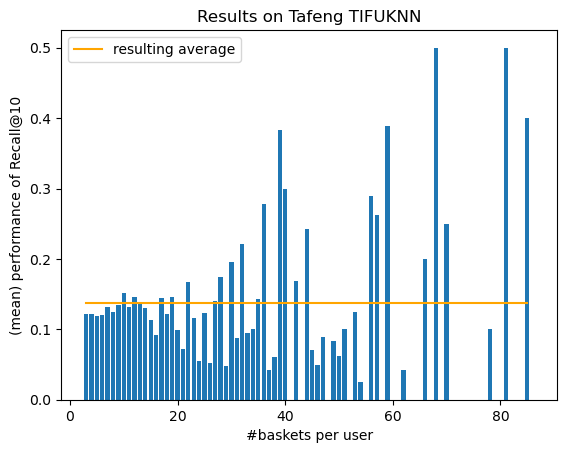

In [87]:
# _d = sorted(all_data['recall@010'].items())
# print(d)
# plt.bar([x[0] for x in _d], [x[1] for x in _d])
# d = [x[0] for x in _d]
# d1 = [x[1] for x in _d]
# plt.plot(range(min(d), max(d)), [np.mean(d1)]*len(range(min(d), max(d))), label="resulting average", c='orange')
# plt.legend()
# plt.xlabel('#baskets per user')
# plt.ylabel('(mean) performance of Recall@10')
# plt.title("Results on Tafeng TIFUKNN")
# plt.show()